<a href="https://colab.research.google.com/github/andrew-ryabchenko/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [ ]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [ ]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,rooms_total
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.shape, df.columns

((48818, 34),
 Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
        'latitude', 'longitude', 'price', 'street_address', 'interest_level',
        'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
        'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
        'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
        'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
        'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
        'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
       dtype='object'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   created               48818 non-null  object 
 3   description           47393 non-null  object 
 4   display_address       48685 non-null  object 
 5   latitude              48818 non-null  float64
 6   longitude             48818 non-null  float64
 7   price                 48818 non-null  int64  
 8   street_address        48808 non-null  object 
 9   interest_level        48818 non-null  object 
 10  elevator              48818 non-null  int64  
 11  cats_allowed          48818 non-null  int64  
 12  hardwood_floors       48818 non-null  int64  
 13  dogs_allowed          48818 non-null  int64  
 14  doorman               48818 non-null  int64  
 15  dishwasher         

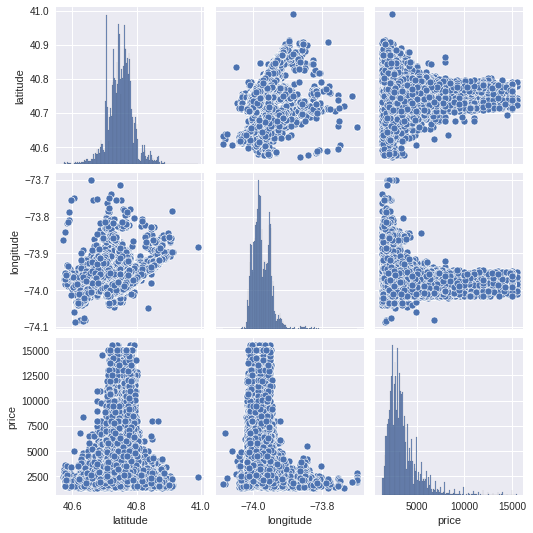

In [ ]:
sns.pairplot(df[['latitude','longitude','price', 'total']])

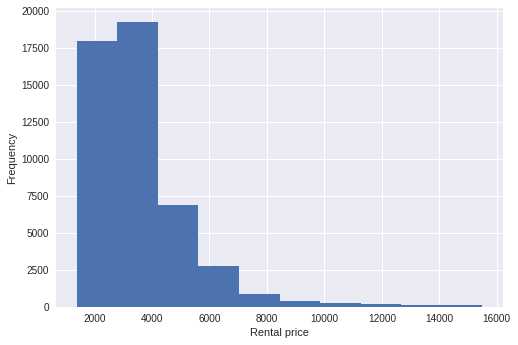

In [ ]:
plt.style.use('seaborn')
df['price'].plot(kind = 'hist')
plt.xlabel('Rental price');

#Making new feature 'rooms_total' 
> Almost all of the features in given dataset are categorical except number of bedrooms and bathrooms, which is good substitute for a 'area' feature which is missing in the dataset. New 'rooms_total' feature will be used as a predictor variable because it correlates with appartment total area and therefore correlates with price. This feature will consist of sum of 'bathrooms' and 'bedrooms' for each observation in dataset.  

In [ ]:
#Creating new feature 'rooms_total' and converting it to the integer type
df['rooms_total'] = (df['bathrooms'] + df['bedrooms']).apply(lambda x: int(x))

#Observing relationship between 'rooms_total' and 'price'

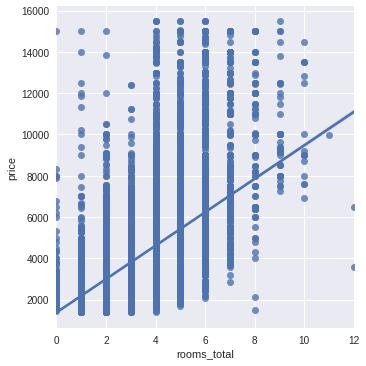

In [ ]:
sns.lmplot(x = 'rooms_total', y = 'price', data = df, fit_reg=True);

#Making baseline model
> As a baseline model we will use mean rental price for all appartments in the dataset

In [ ]:
baseline = df['price'].mean()

#Checking the accuracy of the baseline model using *Mean Absolute Error*

In [ ]:
from sklearn.metrics import mean_absolute_error

baseline_error = mean_absolute_error(df['price'], [baseline]*len(df['price']))
print(f'Baseline model error: {baseline_error}')

Baseline model error: 1201.5251847945751


#Fitting model into data

In [ ]:
#making target vector

y = np.array(df['price'])

In [ ]:
#making feature matrix

X_single_feature = np.array(df[['rooms_total']])

#X_multi_feature = np.array(df[['rooms_total', 'longitude', 'latitude']])

In [ ]:
y.shape, X_single_feature.shape

((48818,), (48818, 3))

In [ ]:
#fitting model into data

model_single_feature = LinearRegression()
model_single_feature.fit(X_single_feature, y);
single_feature_predictions = model_single_feature.predict(X_single_feature)

#model_multi_feature = LinearRegression()
#model_multi_feature.fit(X_multi_feature, y);
#model_multi_feature.coef_

#Checkin accuracy of our model using *Mean Absolute Error* and comparing it to Baseline model error

In [ ]:
#comparing results of baseline model error and our model error

model_error = mean_absolute_error(df['price'], single_feature_predictions)

In [ ]:
print(f'Baseline model error: {baseline_error}\nOur model error: {model_error}')

Baseline model error: 1201.5251847945751
Our model error: 902.2499466151371 


> Comparing errors of both baseline and model we developed , we can conclude that our model is more accurate and significantly outperform baseline model. 

#Interpreting parameters of our model

In [ ]:
print(f'Price change per unit increase in number of rooms: {model_single_feature.coef_[0]}')

Price change per unit increase in number of rooms: 811.1385813370156


>Interpreting the slope of our model, we can say that there is 811$ increase in price for each additional room in the appartment. 